In [3]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=d32fbd2de5b7f4fe07ae58c60a83ea0da3202b8466e6d7b4a5b662f615bd0d73
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [8]:
import numpy as np
import pandas as pd

# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for chloroplath plotting
import chart_studio.plotly as py
import plotly.graph_objs as go 
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import datetime as dt

# pandas general settings
pd.options.display.max_columns = None

data = pd.read_csv('/content/Global_Superstore2.csv',encoding='windows-1252')

Data Preparation

In [9]:
data.head(2) #taking a look at the dataframe structure

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [10]:
# correcting 'Order Date' variable
data[['order_day','order_month','order_year']] = data['Order Date'].str.split('-', expand=True)
data['Order Date'] = data['order_year'] + '/' + data['order_month'] + '/' + data['order_day']
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [11]:
# doing likewise for 'Ship Date'
data[['ship_day','ship_month','ship_year']] = data['Ship Date'].str.split('-', expand=True)
data['Ship Date'] = data['ship_year'] + '/' + data['ship_month'] + '/' + data['ship_day']
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [12]:
data.drop(columns=['order_day','order_month','order_year','ship_day','ship_month','ship_year'], inplace=True)

In [41]:
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Row ID                        51290 non-null  int64         
 1   Order ID                      51290 non-null  object        
 2   Order Date                    51290 non-null  datetime64[ns]
 3   Ship Date                     51290 non-null  datetime64[ns]
 4   Ship Mode                     51290 non-null  category      
 5   Customer ID                   51290 non-null  object        
 6   Customer Name                 51290 non-null  object        
 7   Segment                       51290 non-null  category      
 8   City                          51290 non-null  object        
 9   State                         51290 non-null  object        
 10  Country                       51290 non-null  category      
 11  Postal Code                 

Row ID                          51290
Order ID                        25035
Order Date                       1430
Ship Date                        1464
Ship Mode                           4
Customer ID                      1590
Customer Name                     795
Segment                             3
City                             3636
State                            1094
Country                           147
Postal Code                       631
Market                              7
Region                             13
Product ID                      10292
Category                            3
Sub-Category                       17
Product Name                     3788
Sales                           22995
Quantity                           14
Discount                           27
Profit                          24575
Shipping Cost                   10037
Order Priority                      4
Order_year                          4
unique_customers_within_year        2
dtype: int64

In [14]:
data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Market'] = data['Market'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
data['Order Priority'] = data['Order Priority'].astype('category')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
def remove_leading_spaces(df):
    for cols in df.columns:
        if df[cols].dtypes in ['object','category']:
            df[cols] = df[cols].str.strip()
        return df

In [ ]:
data = remove_leading_spaces(data)

In [16]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [24]:
data['Order_year'] = data['Order Date'].dt.year

In [25]:
print('Number of unique customers made purchase in 2011: {}'.format(data[data['Order_year']==2011]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2012: {}'.format(data[data['Order_year']==2012]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2013: {}'.format(data[data['Order_year']==2013]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2014: {}'.format(data[data['Order_year']==2014]['Customer Name'].nunique()))

Number of unique customers made purchase in 2011: 795
Number of unique customers made purchase in 2012: 795
Number of unique customers made purchase in 2013: 795
Number of unique customers made purchase in 2014: 794


In [26]:
def total_purchase_in_year(row):
    Order_year = row[24]
    
    if Order_year in [2011,2012,2013]:
        return 795
    else:
        return 794
    
    
# generating  'unique_customers_within_year' based on associated year value
# for that particular row

data['unique_customers_within_year'] = data.apply(total_purchase_in_year, axis='columns')

In [ ]:
# Generating 'Revenue' column
data['Revenue'] = data['Sales'] * data['Quantity']

**Product Analysis**

**Question:1**


Which country has top sales?


In [42]:
country_group = data.groupby('Country')
country_sales = country_group.agg({'Sales':'sum'})
country_sales.sort_values(by='Sales', ascending=False)

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
...,...
Tajikistan,2.427840e+02
Macedonia,2.096400e+02
Eritrea,1.877400e+02


**Answer**

We can see that United States has top sales. Things are better when they are visually presented. Let's plot top 10 sales countries.

In [46]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import squarify

In [44]:
top_10_sales = country_sales.nlargest(10, 'Sales')
top_10_sales.index

CategoricalIndex(['United States', 'Australia', 'France', 'China', 'Germany',
                  'Mexico', 'India', 'United Kingdom', 'Indonesia', 'Brazil'],
                 categories=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', ...], ordered=False, dtype='category', name='Country')

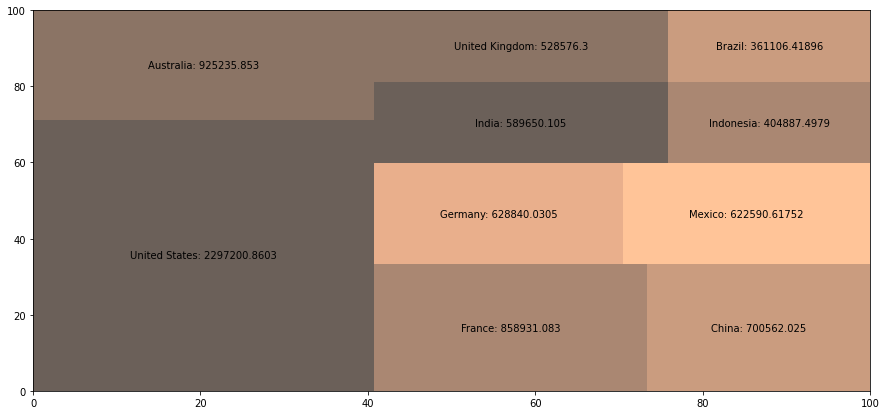

In [48]:
plt.figure(figsize=(15,7))
revs = top_10_sales['Sales'].values
labels = ['United States: 2297200.8603',
         'Australia: 925235.853',
         'France: 858931.083',
         'China: 700562.025',
         'Germany: 628840.0305',
         'Mexico: 622590.61752',
         'India: 589650.105',
         'United Kingdom: 528576.3',
         'Indonesia: 404887.4979',
         'Brazil: 361106.41896']
squarify.plot(revs, label=labels,color= sns.color_palette('copper'), alpha=0.7)
plt.show()

**Question 2**

Which are the top 5 profit-making product types on a yearly basis

In [50]:
year_category_group = data.groupby(['Order_year','Sub-Category'])
year_category_proft_df = year_category_group.agg({'Profit':'sum'})
year_category_proft_df

Profit
Order_year Sub-Category            
2011       Accessories   15719.8606
           Appliances    22838.4413
           Art           10399.0233
           Binders       11447.2053
           Bookcases     27518.8575
...                             ...
2014       Paper         20975.8306
           Phones        70657.6413
           Storage       39016.9521
           Supplies       7365.4090
           Tables       -30545.9084

[68 rows x 1 columns]

In [52]:
year_category_proft_df.reset_index(inplace=True)
category_yearly_profit = year_category_proft_df.groupby('Order_year')
top5_profit_category = pd.DataFrame(columns=year_category_proft_df.columns)

In [53]:
for g, d in category_yearly_profit:
    high_profit_categories = d.nlargest(5, 'Profit')
    top5_profit_category = pd.concat([top5_profit_category,high_profit_categories])

**Answer:**


Below dataframe includes top 5 profit making products for each year

In [54]:
top5_profit_category.style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, 'Profit'])

,Order_year,Sub-Category,Profit
13,2011,Phones,53927.489500
6,2011,Copiers,30375.093440
5,2011,Chairs,29943.157100
4,2011,Bookcases,27518.857500
1,2011,Appliances,22838.441300
23,2012,Copiers,51843.227600
30,2012,Phones,45223.049800
17,2012,Accessories,33507.100200
22,2012,Chairs,28755.346700
21,2012,Bookcases,28137.267100


**Question 3 **


How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level


In [55]:
data['Unit_price'] = data['Sales']/data['Quantity']
data['Order_day'] = data['Order Date'].dt.day

**Answer:**

From below chart we can see that when the prices are lower sales are high and when the prices increase, sales decrease.

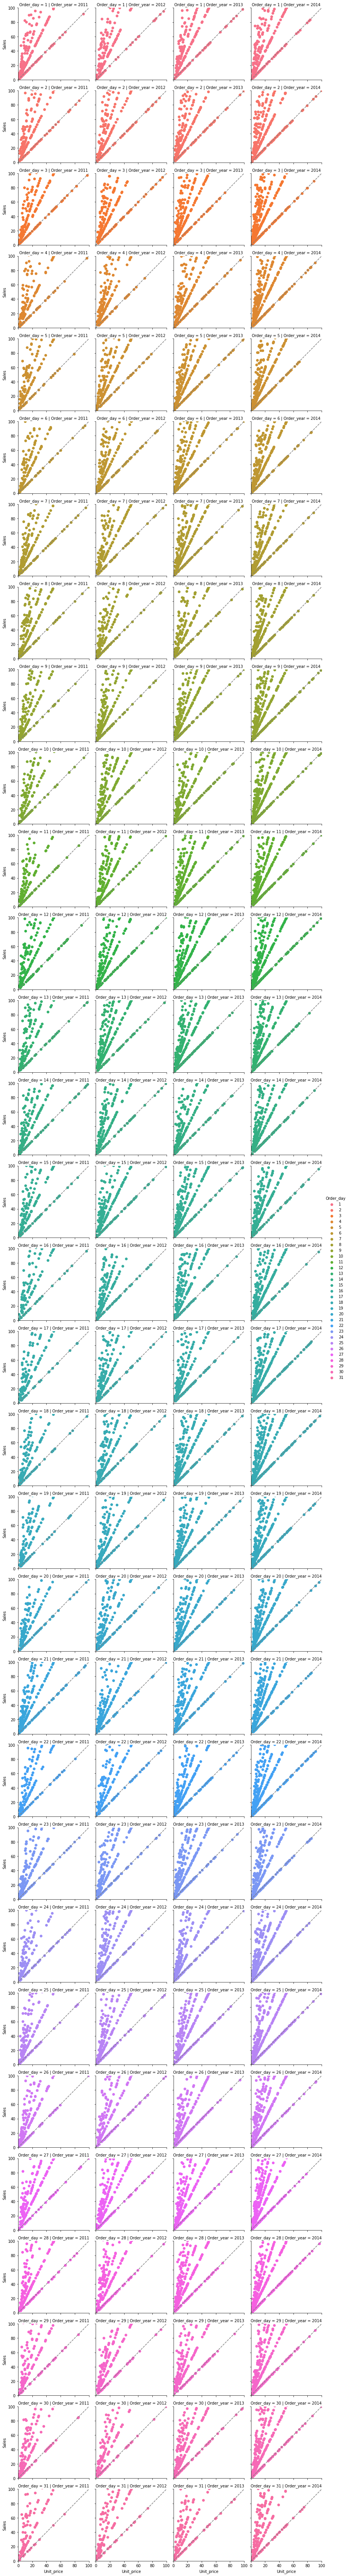

In [56]:
g5 = sns.FacetGrid(data, row = 'Order_day', col = 'Order_year', hue = 'Order_day')
kwe = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g5 = g5.map(plt.scatter, 'Unit_price', 'Sales')
g5.set(xlim=(0,100), ylim=(0,100))
for ax in g5.axes.flat:
    ax.plot((0,100),(0,100), c = 'gray', ls = '--')
g5.add_legend()

**Question:4**

What is the average delivery time across the counties?

In [57]:
data['Delivery_duration'] = data['Ship Date']-data['Order Date']
country_group = data.groupby('Country')
delivery_duration_df = country_group.agg({'Delivery_duration':'mean'})
delivery_duration_df['Duration_in_hours'] = delivery_duration_df['Delivery_duration'] / dt.timedelta(hours=1)

We have 147 unique countries in our dataframe. Plotting them altogether on a same plot wouln't be possible. So I will only plot top 10 sales countries.

In [ ]:
delivery_duration_df

**Answer**

In [58]:
top10_sales_country_DD =top_10_sales.merge(delivery_duration_df, how='left', left_index=True, right_index=True)
top10_sales_country_DD.reset_index(inplace=True)
top10_sales_country_DD.sort_values(by='Duration_in_hours')

,Country,Sales,Delivery_duration,Duration_in_hours
3,China,7.005620e+05,3 days 21:22:12.765957446,93.370213
9,Brazil,3.611064e+05,3 days 21:46:43.001876172,93.778612
2,France,8.589311e+05,3 days 22:39:31.135479306,94.658649
1,Australia,9.252359e+05,3 days 22:39:48.156503348,94.663377
0,United States,2.297201e+06,3 days 23:00:46.828096858,95.013008
5,Mexico,6.225906e+05,3 days 23:18:03.812405446,95.301059
6,India,5.896501e+05,3 days 23:22:57.491961414,95.382637
8,Indonesia,4.048875e+05,3 days 23:36:10.359712230,95.602878
4,Germany,6.288400e+05,4 days 01:45:59.709443099,97.766586
7,United Kingdom,5.285763e+05,4 days 02:29:54.488671157,98.498469


In [66]:
top10_sales_country_DD.iplot(kind='bar',x='Country', y='Duration_in_hours',
                            title= 'Countries And their Average Product Delivery Duration in Hours',
                            xTitle='Countries',
                            yTitle= 'AVG Delivery Duration in hours')
